In [135]:
from sklearn.preprocessing import MinMaxScaler
from numpy import NaN, int64
import math
import pandas as pd
#from sklearn.model_selection import train_test_split #для разделения на тест и трейн
from sklearn.neighbors import KNeighborsRegressor #используемый метод
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error #Оценка качества модели
ss = pd.read_csv('data4/sample_submission.csv')
testDF = pd.read_csv('data4/test_x.csv')
trainDF = pd.read_csv('data4/train.csv')
print(trainDF.dtypes[trainDF.dtypes == 'object'])
#trainDF.hist(bins=50, figsize=(20,30))
#trainDF.info()
#trainDF.describe()
#trainDF.value_counts()
#print(trainDF.shape)
#print(testDF.shape)
#trainDF.insert(1, 'osm_catering_points1', (trainDF['osm_catering_points_in_0.005'] * 200 +
#                                           trainDF['osm_catering_points_in_0.0075'] * 133 + trainDF['osm_catering_points_in_0.01'] * 100)/300)
#trainDF.insert(1, 'osm_amenity_points1', (trainDF['osm_amenity_points_in_0.005'] * 400 +
 #              trainDF['osm_amenity_points_in_0.0075'] * 133 + trainDF['osm_amenity_points_in_0.01'] * 100)/300)
CorrKoef = trainDF.corr()
CorField = []
#if (trainDF['osm_amenity_points1'] in CorrKoef.index[CorrKoef['per_square_meter_price'] > 0.45]):
  #  print('YES')
for j in CorrKoef.index[CorrKoef['per_square_meter_price'] > 0.482]:
    if (j == 'osm_catering_points1'):
        print('YES')
    if 'per_square_meter_price' != j and j not in CorField and 'per_square_meter_price' not in CorField:
        CorField.append(j)
        #print('per_square_meter_price', j,
              #CorrKoef['per_square_meter_price'][CorrKoef.index == j].values[0])
print(CorField)
cols = CorField
cols.append('per_square_meter_price')
#cols.append('osm_catering_points_in_0.0075')
#cols.append('osm_catering_points_in_0.01')
trainDF = trainDF[cols]
print(trainDF.shape)
#avg_value = trainDF[~trainDF.osm_city_nearest_population.isna()
 #                   ].osm_city_nearest_population.mean()
#trainDF = trainDF.assign(
#    osm_city_nearest_population=trainDF.osm_city_nearest_population.fillna(avg_value))
trainDF.dropna(axis='columns', how='any', inplace=True)
trainDF.insert(1, 'osm_amenity_points1', (trainDF['osm_amenity_points_in_0.005'] * 200 +
               trainDF['osm_amenity_points_in_0.0075'] * 133 + trainDF['osm_amenity_points_in_0.01'] * 100)/300) #при объединении этих признаков получаем большкю кореляцию
#trainDF.insert(1, 'osm_catering_points1', (trainDF['osm_catering_points_in_0.005'] * 200 +
#               trainDF['osm_catering_points_in_0.0075'] * 133 + trainDF['osm_catering_points_in_0.01'] * 100)/300)
cols = trainDF.columns.values.tolist()
cols.remove('osm_amenity_points1')
#cols.remove('osm_catering_points1')
##print(trainDF.shape)
cols.remove('per_square_meter_price')
testDF = testDF[cols]
#avg_value = testDF[~testDF.osm_city_nearest_population.isna()
 #                   ].osm_city_nearest_population.mean()
#testDF = testDF.assign(
#    osm_city_nearest_population=testDF.osm_city_nearest_population.fillna(avg_value))
testDF.insert(1, 'osm_amenity_points1', (testDF['osm_amenity_points_in_0.005'] * 200 +
                                         testDF['osm_amenity_points_in_0.0075'] * 133 + testDF['osm_amenity_points_in_0.01'] * 100)/300)
#testDF.insert(1, 'osm_catering_points1', (testDF['osm_catering_points_in_0.005'] * 200 +
##                                         testDF['osm_catering_points_in_0.0075'] * 133 + testDF['osm_catering_points_in_0.01'] * 100)/300)
#trainDF.drop(columns=['osm_catering_points_in_0.01',
#             'osm_catering_points_in_0.0075'], axis=1, inplace=True)
#testDF.drop(columns=['osm_catering_points_in_0.01',
#            'osm_catering_points_in_0.0075'], axis=1, inplace=True)
trainDF.head()
testDF.head()
#osm - open street map
#osm_catering_points_in_0.005 Количество заведений общепита в радиусе 500 метров
#osm_amenity_points_in_0.005 Количество объектов связанных с удобством в радиусе 500 метров
#osm_city_nearest_population Население ближайшего города

city                     object
id                       object
osm_city_nearest_name    object
region                   object
street                   object
date                     object
dtype: object
['osm_amenity_points_in_0.005', 'osm_amenity_points_in_0.0075', 'osm_amenity_points_in_0.01', 'osm_catering_points_in_0.005', 'osm_city_nearest_population']
(206474, 6)


,osm_amenity_points_in_0.005,osm_amenity_points1,osm_amenity_points_in_0.0075,osm_amenity_points_in_0.01,osm_catering_points_in_0.005
0,21,66.276667,51,89,2
1,1,10.770000,7,21,0
2,21,47.070000,37,50,3
3,5,36.956667,39,49,1
4,8,11.880000,8,9,2


In [136]:
scaler = MinMaxScaler()
scaler.fit(trainDF)
scaler.fit(testDF)
target_col = 'per_square_meter_price'
train_x, train_y = trainDF.drop(
    columns=['per_square_meter_price'], axis=1), trainDF[target_col]
test_x, test_y = testDF, ss[target_col]
model = LinearRegression()
model.fit(train_x, train_y)
pred = model.predict(test_x)*1.9
mean_absolute_percentage_error(test_y, pred/1.9)

0.508837795395076

In [137]:
ss1 = ss;
ss1 = ss.drop(columns = ['per_square_meter_price'], axis = 1)
ss1 = ss.assign(per_square_meter_price=pred)
def change_mist(s: pd.Series) -> pd.Series:
    if (s < 0):
        return abs(s)
    return s
ss1.per_square_meter_price = ss1.per_square_meter_price.apply(change_mist)
ss1.to_csv('data4/submission.csv', index=False)

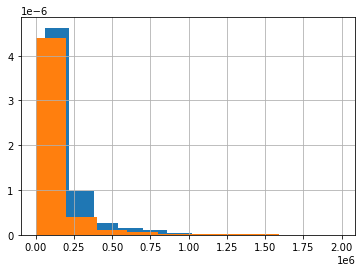

In [138]:
ss11 = pd.read_csv('data4/submission.csv')
#ss['rating_org'].hist()
ss11['per_square_meter_price'].hist(density=True)
trainDF['per_square_meter_price'].hist(density=True)
ss11.to_csv('data4/submission1.csv', index=False)


<AxesSubplot:>

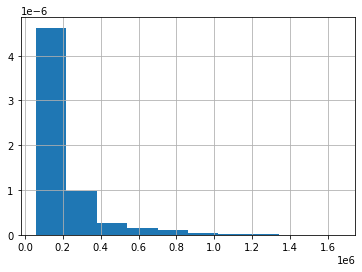

In [139]:
#trainDF['per_square_meter_price'].hist(density=True)
ss11['per_square_meter_price'].hist(density=True)


<AxesSubplot:>

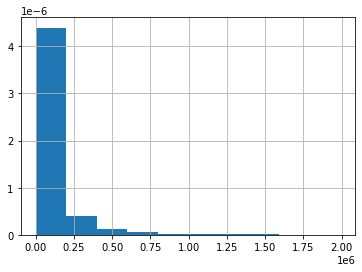

In [122]:
trainDF['per_square_meter_price'].hist(density=True)
